<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Random_Forest_for_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**

In [1]:
from google.colab import files
upload=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
median_sales=df["Sales"].median()

In [4]:
df["Sales"]=["High" if value > median_sales
             else "Low" for value in df["Sales"]]
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


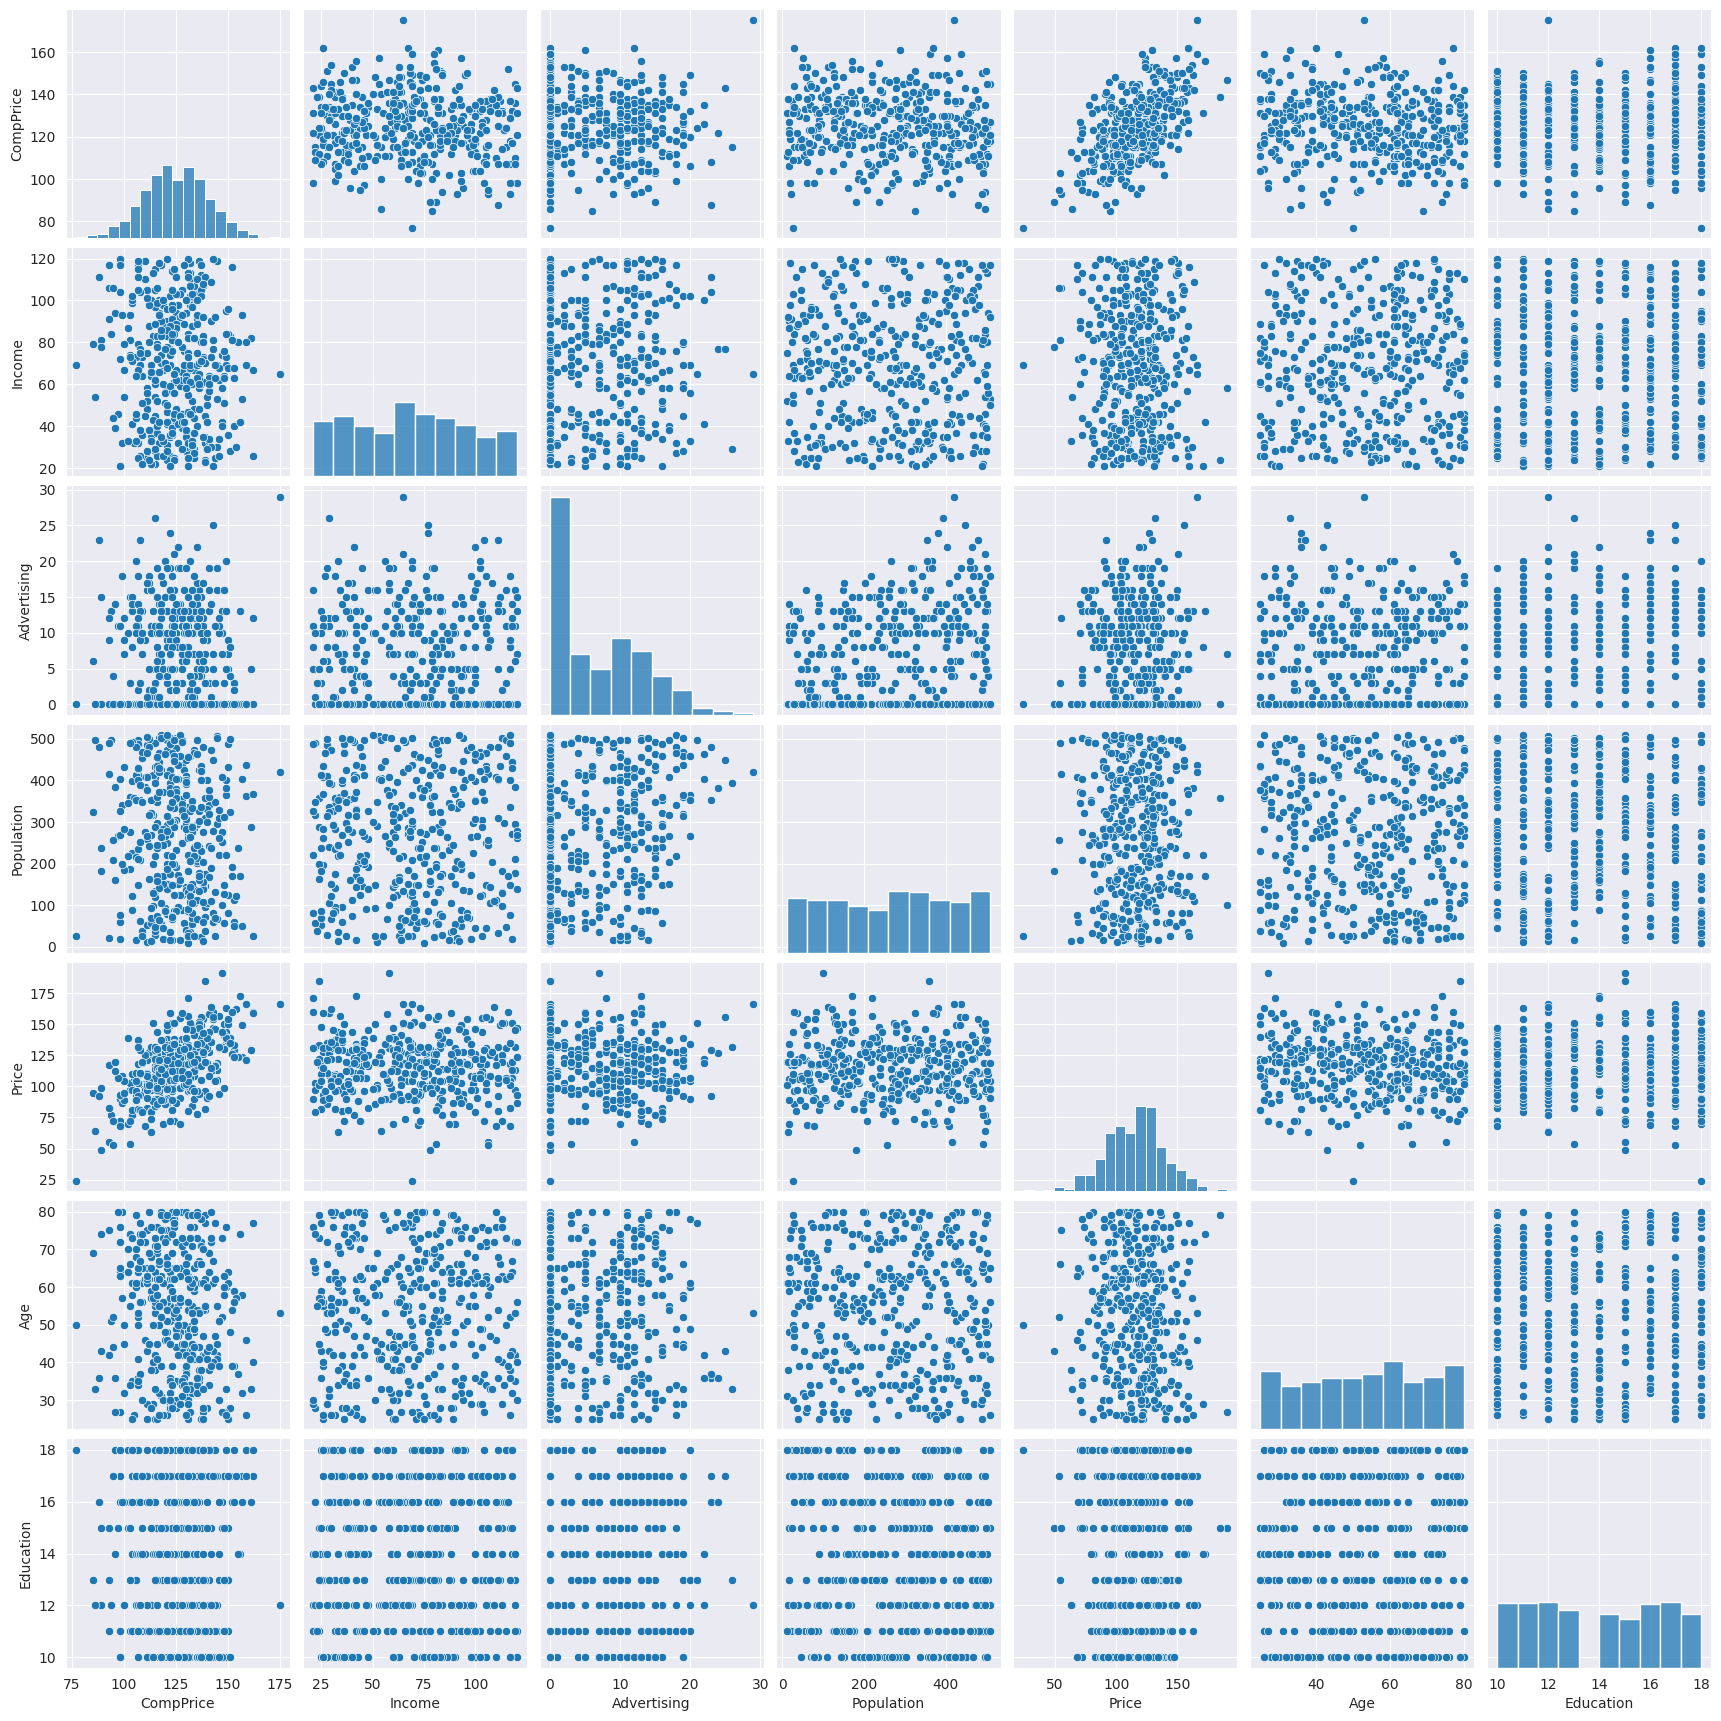

In [5]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

array([[<Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>, <Axes: >, <Axes: >]],
      dtype=object)

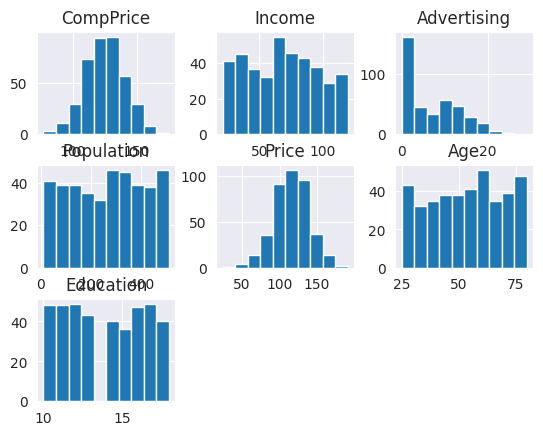

In [6]:
df.hist()

In [7]:
df.skew()

<ipython-input-7-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [8]:
df.kurt()

<ipython-input-8-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [9]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Columns_to_encoder=["Sales","ShelveLoc","Urban","US"]
for column in Columns_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [11]:
X=df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [43]:
Y=df["Sales"]
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

In [13]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,-0.035578,-0.123460,-0.251910,-0.069327,0.392275,-0.106962,0.186707,0.028847,0.047090,-0.142579
CompPrice,-0.035578,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.123460,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.251910,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.069327,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.392275,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,-0.106962,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,0.186707,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.028847,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.047090,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion ='entropy',max_depth=3)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

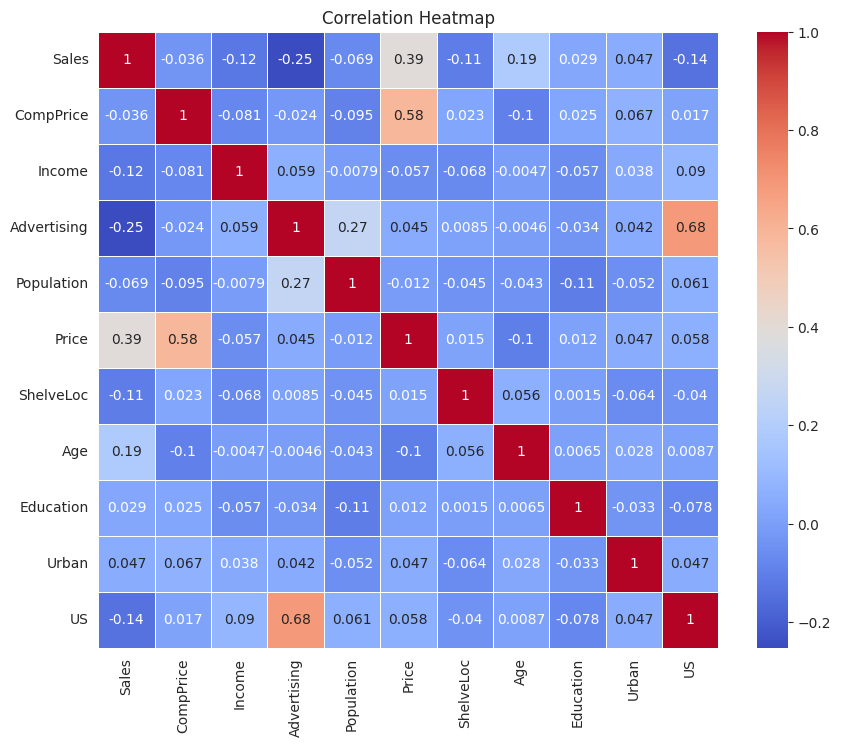

In [18]:
# Heatmap
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

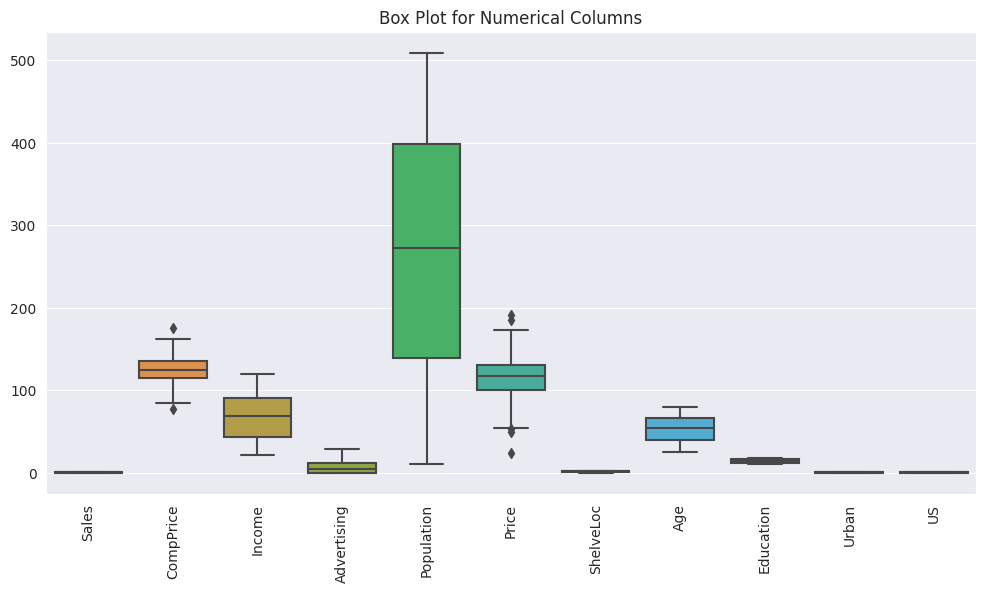

In [19]:
# Check for outliers in numerical columns using box plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training Data:",ac1.round(3))
print("accuracy Score Test Data:",ac2.round(3))

Accuracy Score Training Data: 0.763
accuracy Score Test Data: 0.63


In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=150,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6, n_estimators=150)

In [22]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Random Forest for Training Data:",ac1.round(3))
print("Random Forest For Test Data:",ac2.round(3))

Random Forest for Training Data: 1.0
Random Forest For Test Data: 0.76


[Text(0.5, 0.875, 'x[4] <= 131.5\nentropy = 0.999\nsamples = 300\nvalue = [154, 146]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.966\nsamples = 230\nvalue = [140, 90]'),
 Text(0.125, 0.375, 'x[2] <= 7.5\nentropy = 0.886\nsamples = 56\nvalue = [17, 39]'),
 Text(0.0625, 0.125, 'entropy = 0.592\nsamples = 35\nvalue = [5, 30]'),
 Text(0.1875, 0.125, 'entropy = 0.985\nsamples = 21\nvalue = [12, 9]'),
 Text(0.375, 0.375, 'x[5] <= 1.5\nentropy = 0.873\nsamples = 174\nvalue = [123, 51]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.968\nsamples = 129\nvalue = [78, 51]'),
 Text(0.75, 0.625, 'x[0] <= 147.5\nentropy = 0.722\nsamples = 70\nvalue = [14, 56]'),
 Text(0.625, 0.375, 'x[2] <= 23.0\nentropy = 0.485\nsamples = 57\nvalue = [6, 51]'),
 Text(0.5625, 0.125, 'entropy = 0.376\nsamples = 55\nvalue = [4, 51]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'x[4] <= 149.5\nentropy = 0.961\nsa

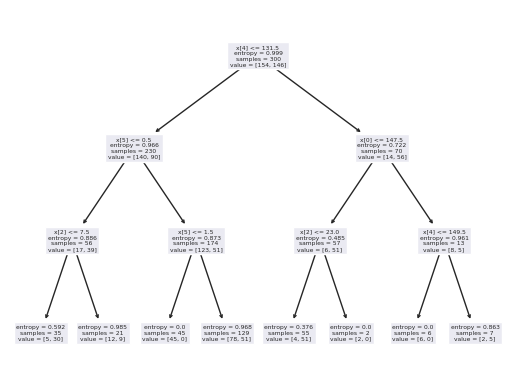

In [24]:
from sklearn import tree
tree.plot_tree(DTC)

In [25]:
# Gradient Boosting
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=(8),
                        n_estimators=100,
                        max_samples= 0.6,
                        max_features = 0.7,
                        random_state=123)
RF.fit(X_train,Y_train)
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("RF- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("RF- Test Error:", np.sqrt(error2).round(3))
print("RF- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

RF- Training Error: 0.219
RF- Test Error: 0.391
RF- Variance between Train and Test 0.172


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=300,
                                max_depth=3,
                                learning_rate=0.05,)

GBR.fit(X_train,Y_train)
Y_pred_train = GBR.predict(X_train)
Y_pred_test = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("GBR- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("GBR- Test Error:", np.sqrt(error2).round(3))
print("GBR- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))


GBR- Training Error: 0.143
GBR- Test Error: 0.396
GBR- Variance between Train and Test 0.253


In [27]:
# Grid search CV
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(100,700,100),'learning_rate': np.arange(0.001,0.1,0.01)}

gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(),
                        param_grid = param_test1,
                        scoring='neg_mean_squared_error', cv=5)

gsearch1.fit(X,Y)

import numpy as np
np.sqrt(abs(gsearch1.best_score_))

gsearch1.best_params_



{'learning_rate': 0.08099999999999999, 'n_estimators': 100}

In [28]:
# step5:  Decision Trees
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)


In [29]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=250,
                        learning_rate=2)

ABR.fit(X_train,Y_train)
Y_pred_train = ABR.predict(X_train)
Y_pred_test = ABR.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("ABR- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("ABR- Test Error:", np.sqrt(error2).round(3))
print("ABR- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ABR- Training Error: 0.058
ABR- Test Error: 0.539
ABR- Variance between Train and Test 0.481


In [70]:
pip install xgboost


In [75]:
pip install scikit-learn

In [72]:
#Classification Example with XGBoost:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Specify multiclass classification
    'num_class': 3,  # Number of classes
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.3,  # Learning rate
    'subsample': 0.7,  # Fraction of samples used for fitting the trees
    'colsample_bytree': 0.7  # Fraction of features used for fitting the trees
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)

# Make predictions
predictions = model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 100.00%


AttributeError: ignored

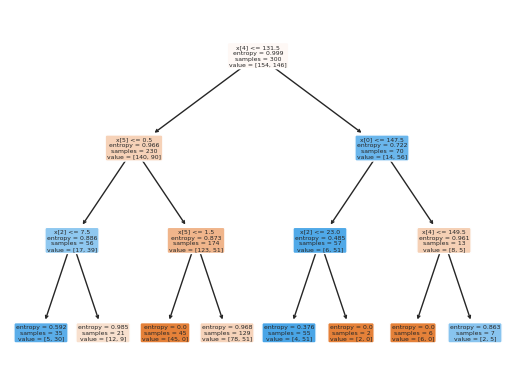

In [79]:
from sklearn import tree
import graphviz

data=tree.plot_tree(DTC,filled=True,rounded=True)
graph=graphviz.Source(data)
graph